In [5]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [6]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()


This is how maze looks like:

□ □ □ □ □
□ X □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [7]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *

cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    epsilon_0=0.01,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200
                    )


In [8]:
df = avg_experiment(maze=maze,
                         cfg=cfg,
                         number_of_tests=1,
                         explore_trials=1000,
                         exploit_trials=1000)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 39, 'reward': 1000.0, 'perf_time': 0.02473699999973178, 'numerosity': 90, 'population': 86, 'average_specificity': 9.311111111111112, 'fraction_accuracy': 0.041666666666666664}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 18, 'reward': 1003.2398142073862, 'perf_time': 0.15925530000004073, 'numerosity': 1411, 'population': 791, 'average_specificity': 17.42806520198441, 'fraction_accuracy': 0.016666666666666666}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1128.3696637361093, 'perf_time': 0.09762419999970007, 'numerosity': 1800, 'population': 1021, 'average_specificity': 15.462777777777777, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 24, 'reward': 1000.6925982767643, 'perf_time': 0.3459408999997322, 'numerosity': 1800, 'population': 1150, 'average_specificity': 17.066111111111113, 'fraction_accuracy': 0.008333333333333333}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 6, 'reward': 1128.1003257966674, 'perf_time': 0.15353270000014163, 'numerosity': 1800, 'population': 1133, 'average_specificity': 18.805, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 

In [9]:
display(df)

,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,39,1.000000e+03,0.024737,90,86,9.311111,0.041667
100,18,1.003240e+03,0.159255,1411,791,17.428065,0.016667
200,6,1.128370e+03,0.097624,1800,1021,15.462778,0.000000
300,24,1.000693e+03,0.345941,1800,1150,17.066111,0.008333
400,6,1.128100e+03,0.153533,1800,1133,18.805000,0.000000
500,2,1.684861e+03,0.030647,1800,1185,19.858333,0.135000
600,11,1.023121e+03,0.170805,1800,1212,17.901667,0.125000
700,21,1.000761e+03,0.325119,1800,1252,20.461111,0.148292
800,12,1.028069e+03,0.174642,1800,1245,21.549444,0.125000


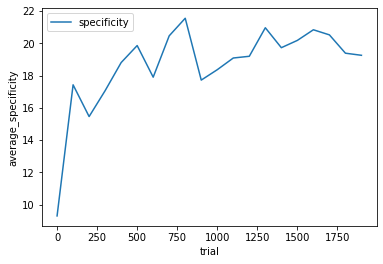

In [10]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


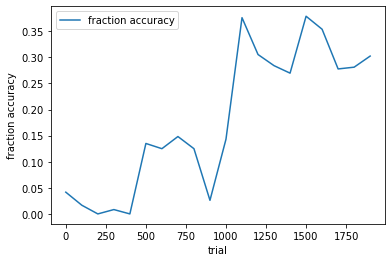

In [11]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

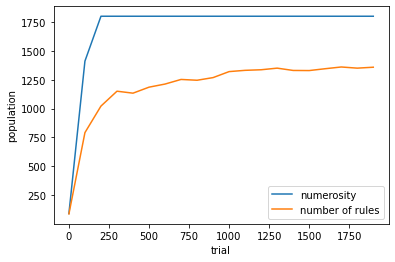

In [12]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

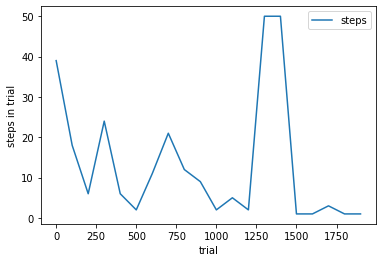

In [13]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])